###    Importing the librarires 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

###   Importing the dataset

In [2]:
data=pd.read_csv("Fraud_dataset.csv")
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Term,Credit_History_Available,Housing,Locality,Fraud_Risk
0,1,0,0,1,0,5849,0,146,360,1,1,1,0
1,1,1,1,1,1,4583,1508,128,360,1,1,3,1
2,1,1,0,1,1,3000,0,66,360,1,1,1,1
3,1,1,0,0,1,2583,2358,120,360,1,1,1,1
4,1,0,0,1,0,6000,0,141,360,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,0,0,1,1,0,2872,1556,91,360,1,1,1,0
823,0,0,1,1,1,8596,0,162,360,1,1,2,0
824,1,0,1,1,1,3664,0,109,215,1,1,1,0
825,1,0,2,1,0,4921,0,162,360,0,1,2,0


In [3]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Term,Credit_History_Available,Housing,Locality,Fraud_Risk
0,1,0,0,1,0,5849,0,146,360,1,1,1,0
1,1,1,1,1,1,4583,1508,128,360,1,1,3,1
2,1,1,0,1,1,3000,0,66,360,1,1,1,1
3,1,1,0,0,1,2583,2358,120,360,1,1,1,1
4,1,0,0,1,0,6000,0,141,360,1,1,1,0


In [4]:
 data.shape

(827, 13)

###     Checking the data types of all the columns

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Gender                    827 non-null    int64
 1   Married                   827 non-null    int64
 2   Dependents                827 non-null    int64
 3   Education                 827 non-null    int64
 4   Self_Employed             827 non-null    int64
 5   ApplicantIncome           827 non-null    int64
 6   CoapplicantIncome         827 non-null    int64
 7   LoanAmount                827 non-null    int64
 8   Loan_Term                 827 non-null    int64
 9   Credit_History_Available  827 non-null    int64
 10  Housing                   827 non-null    int64
 11  Locality                  827 non-null    int64
 12  Fraud_Risk                827 non-null    int64
dtypes: int64(13)
memory usage: 84.1 KB


###      Checking Null valueS OR MISSING VALUES

In [6]:
data.isnull().sum()

Gender                      0
Married                     0
Dependents                  0
Education                   0
Self_Employed               0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  0
Loan_Term                   0
Credit_History_Available    0
Housing                     0
Locality                    0
Fraud_Risk                  0
dtype: int64

####  Look Describe Dataset

In [7]:
data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Term,Credit_History_Available,Housing,Locality,Fraud_Risk
count,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000
mean,0.733978,0.481258,0.652963,0.790810,0.574365,5212.970979,1486.050786,140.892382,338.128174,0.885127,0.654172,1.978235,0.576784
std,0.442143,0.499951,0.935835,0.406976,0.494738,5593.713304,2802.847983,79.820451,75.353151,0.319062,0.475925,0.771471,0.494368
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,2894.500000,0.000000,100.000000,360.000000,1.000000,0.000000,1.000000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,3752.000000,0.000000,125.000000,360.000000,1.000000,1.000000,2.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,5478.000000,2177.000000,156.500000,360.000000,1.000000,1.000000,3.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000,3.000000,1.000000


## FINDING duplicate data

In [8]:
data.duplicated().sum()

3

### Data Vistualization:

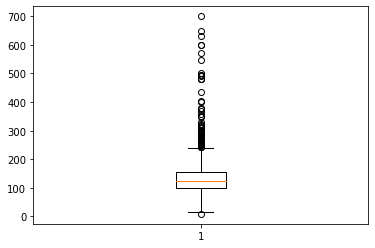

In [11]:
import matplotlib.pyplot as plt
plt.barplot(data["LoanAmount"]);

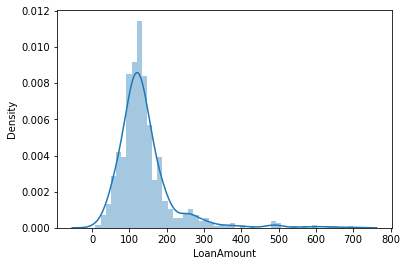

In [12]:
sns.distplot(data["LoanAmount"]);

<AxesSubplot:>

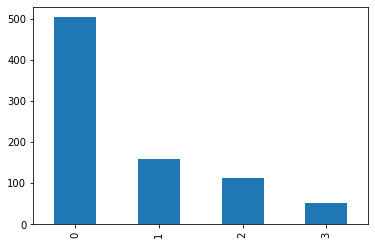

In [14]:
data['Dependents'].value_counts().plot.bar()

#### graph what the the relationship between Loan Amount and Loan Term

<AxesSubplot:xlabel='Gender', ylabel='Dependents'>

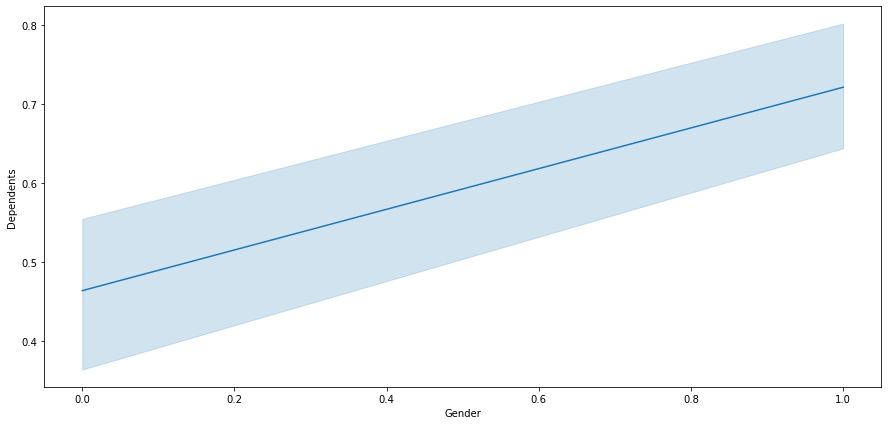

In [26]:
plt.figure(figsize=(15,7))
sns.lineplot(data=data,x="Gender", y="Dependents")

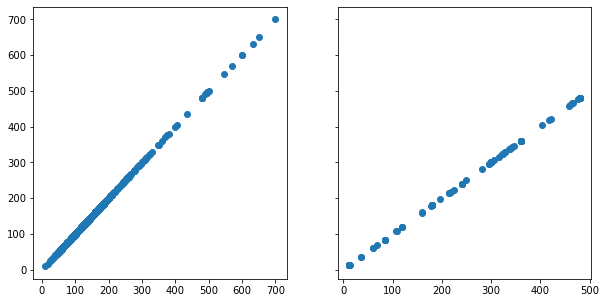

In [30]:
fig, axs = plt.subplots(1,2,sharey=True, figsize=(10,5))
axs[0].scatter(x=data['LoanAmount'], y=data['LoanAmount'])
axs[1].scatter(x=data['Loan_Term'], y=data['Loan_Term'])

In [31]:
correlation = data.corr()
print(correlation['LoanAmount'].sort_values(ascending = False),'\n')

LoanAmount                  1.000000
ApplicantIncome             0.564923
Self_Employed               0.229533
Dependents                  0.182559
Married                     0.175254
CoapplicantIncome           0.165940
Fraud_Risk                  0.164087
Education                   0.154714
Gender                      0.089613
Loan_Term                   0.073583
Locality                    0.022021
Credit_History_Available   -0.024920
Housing                    -0.084477
Name: LoanAmount, dtype: float64 



Index(['LoanAmount', 'ApplicantIncome', 'Self_Employed', 'Dependents',
       'Married', 'CoapplicantIncome', 'Fraud_Risk', 'Education', 'Gender',
       'Loan_Term'],
      dtype='object')


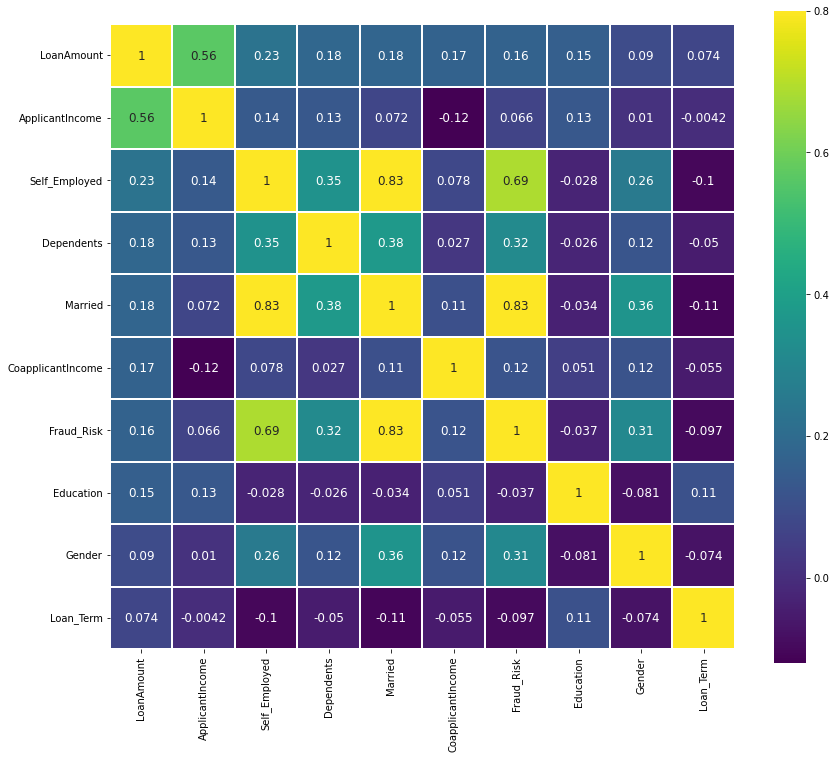

In [32]:
k= 10
cols = correlation.nlargest(k,'LoanAmount')['LoanAmount'].index
print(cols)
cm = np.corrcoef(data[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)
plt.show()

### Correlation Matrix:

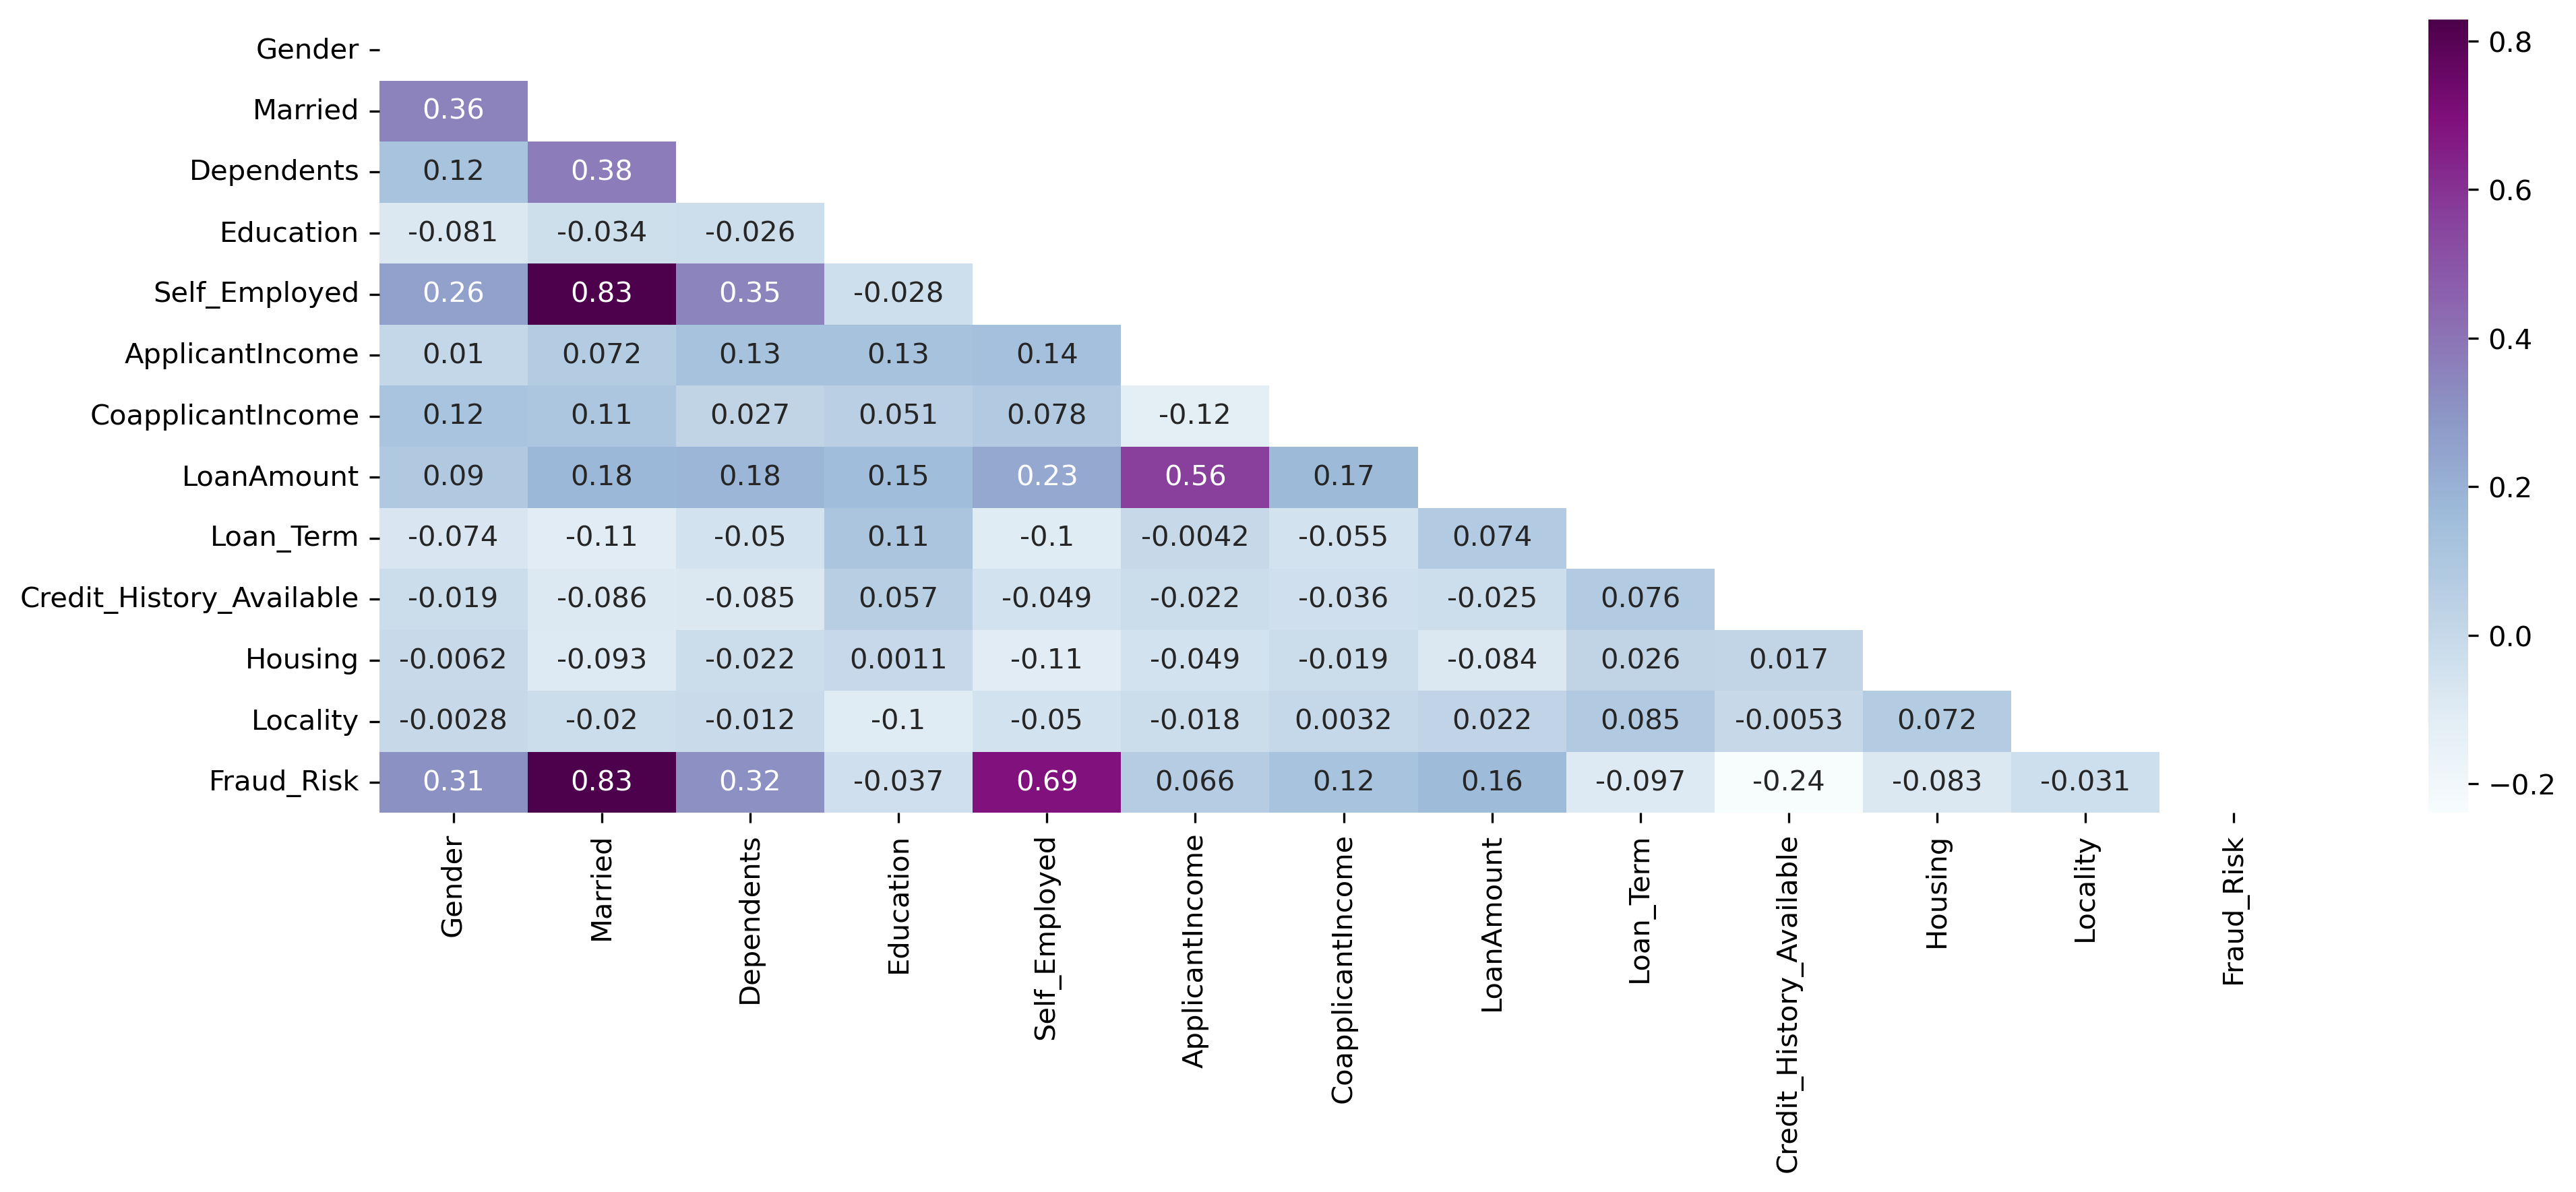

In [42]:
plt.figure(figsize=(14,6), dpi=300)
data_corr = data.corr()
mask = np.triu(np.ones_like(data_corr, dtype=bool))
sns.heatmap(data_corr, mask=mask, annot=True, cmap="BuPu")
plt.tight_layout()

### Define Dependant and Independent value: 

In [45]:
data.columns
X=data.loc[:,['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Term','Credit_History_Available','Housing','Locality']]
y=data.iloc[:,-1]

In [48]:
X
y

0      0
1      1
2      1
3      1
4      0
      ..
822    0
823    0
824    0
825    0
826    0
Name: Fraud_Risk, Length: 827, dtype: int64

###     Splitting Data as Train Data and Test Data

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Linear Regreesion

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr=LinearRegression()

In [51]:
lr.fit(X_train,y_train)

LinearRegression()

In [52]:
pred=lr.predict(X_test)

In [53]:
pred[:10]

array([0.1723788 , 0.17518826, 0.95732197, 0.95300116, 0.41313695,
       0.94245648, 0.13150053, 0.97617863, 0.96879267, 0.47079448])

In [54]:
y_test[:10]

196    0
763    0
266    1
350    1
168    1
239    1
813    0
86     1
259    1
764    0
Name: Fraud_Risk, dtype: int64

In [55]:
r2_score(pred,y_test)

0.5945909973419854

###     Decision Tree Regression:

In [56]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=7)

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=7)

In [59]:
pred=dtr.predict(X_test)
pred

array([0.0990099, 0.0990099, 1.       , 1.       , 1.       , 1.       ,
       0.0990099, 1.       , 1.       , 0.       , 1.       , 1.       ,
       0.0990099, 1.       , 1.       , 1.       , 1.       , 0.0990099,
       1.       , 1.       , 1.       , 1.       , 0.0990099, 0.0990099,
       1.       , 1.       , 1.       , 0.0990099, 0.0990099, 1.       ,
       0.0990099, 0.0990099, 1.       , 1.       , 0.0990099, 0.0990099,
       1.       , 0.0990099, 1.       , 1.       , 1.       , 0.0990099,
       1.       , 1.       , 1.       , 1.       , 1.       , 0.0990099,
       1.       , 1.       , 0.0990099, 1.       , 0.0990099, 1.       ,
       0.0990099, 1.       , 0.0990099, 0.0990099, 1.       , 1.       ,
       0.0990099, 0.0990099, 0.0990099, 1.       , 0.0990099, 0.0990099,
       1.       , 0.0990099, 0.0990099, 1.       , 0.0990099, 0.0990099,
       1.       , 0.0990099, 1.       , 0.0990099, 1.       , 0.0990099,
       1.       , 0.0990099, 0.0990099, 1.       , 

In [60]:
r2_score(y_test,pred)

0.7255005896629267

In [61]:
from sklearn import tree
import matplotlib.pyplot as plt

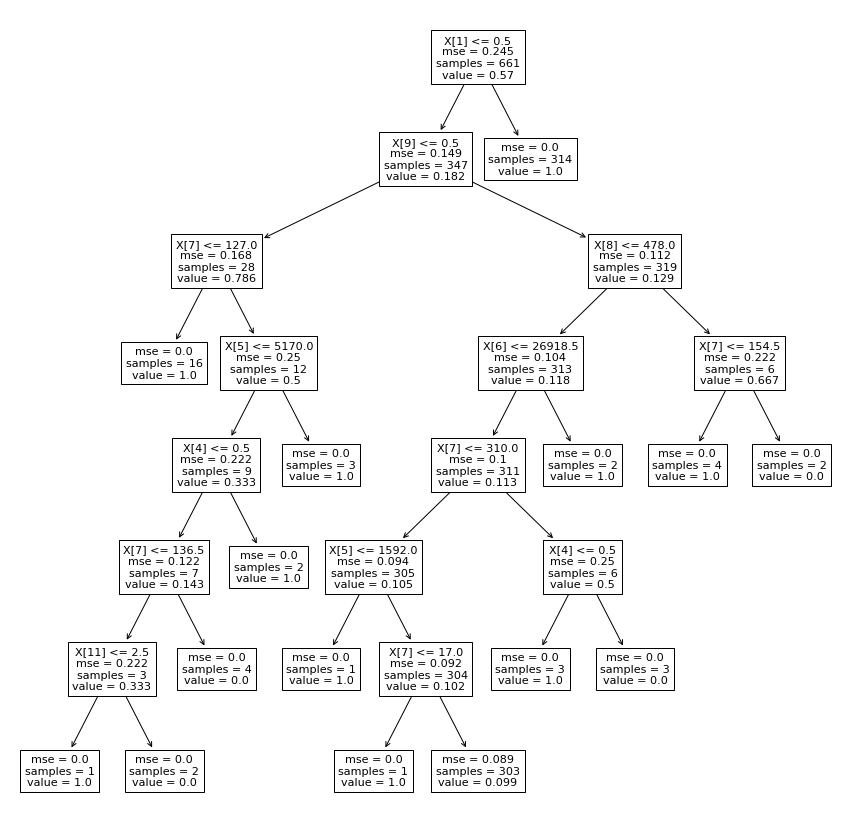

In [62]:
plt.figure(figsize=(15,15))
tree.plot_tree(dtr);

###  Neaural Network:

In [63]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
ss=StandardScaler()
norm=MinMaxScaler()

In [64]:
X_stan=ss.fit_transform(X)
X_norm=norm.fit_transform(X)
X_stan
#X_norm

array([[ 0.60202842, -0.96319205, -0.69815472, ...,  0.36025189,
         0.72708366, -1.26877963],
       [ 0.60202842,  1.03821455,  0.37105631, ...,  0.36025189,
         0.72708366,  1.32523954],
       [ 0.60202842,  1.03821455, -0.69815472, ...,  0.36025189,
         0.72708366, -1.26877963],
       ...,
       [ 0.60202842, -0.96319205,  0.37105631, ...,  0.36025189,
         0.72708366, -1.26877963],
       [ 0.60202842, -0.96319205,  1.44026734, ..., -2.77583558,
         0.72708366,  0.02822995],
       [ 0.60202842, -0.96319205, -0.69815472, ...,  0.36025189,
         0.72708366,  0.02822995]])

In [65]:
scalling=StandardScaler()
X_train=scalling.fit_transform(X_train)
X_test=scalling.fit_transform(X_test)

In [74]:
model=Sequential()

#first Layer
model.add(Dense(input_dim=12,activation='relu',units=32))

#second layer
model.add(Dense(units=32,activation='relu'))

#third layer
model.add(Dense(32,activation='relu'))

#last layer/output layer
model.add(Dense(units=1))

#Compliling ANN
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae','mse','mape'])

#fitting ANN In Traning Data
model.fit(X_train,y_train,batch_size=10,epochs=100)

Epoch 1/100
67/67 [==============================] - 6s 6ms/step - loss: 0.1955 - mae: 0.3637 - mse: 0.1955 - mape: 135368560.0000
Epoch 2/100
67/67 [==============================] - 0s 3ms/step - loss: 0.0933 - mae: 0.2289 - mse: 0.0933 - mape: 85032752.0000
Epoch 3/100
67/67 [==============================] - 0s 3ms/step - loss: 0.0736 - mae: 0.1913 - mse: 0.0736 - mape: 73670288.0000
Epoch 4/100
67/67 [==============================] - 0s 3ms/step - loss: 0.0642 - mae: 0.1691 - mse: 0.0642 - mape: 62949664.0000
Epoch 5/100
67/67 [==============================] - 0s 3ms/step - loss: 0.0584 - mae: 0.1556 - mse: 0.0584 - mape: 63463840.0000
Epoch 6/100
67/67 [==============================] - 0s 3ms/step - loss: 0.0532 - mae: 0.1431 - mse: 0.0532 - mape: 58129008.0000
Epoch 7/100
67/67 [==============================] - 0s 3ms/step - loss: 0.0508 - mae: 0.1345 - mse: 0.0508 - mape: 52788872.0000
Epoch 8/100
67/67 [==============================] - 0s 3ms/step - loss: 0.0484 - mae: 0.

In [75]:
model.evaluate(X_train,y_train)

model.evaluate(X_test,y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.0733 - mae: 0.1506 - mse: 0.0733 - mape: 37477492.0000


[0.07332462817430496, 0.15063023567199707, 0.07332462817430496, 37477492.0]

In [76]:
y_test

196    0
763    0
266    1
350    1
168    1
      ..
628    0
299    1
213    1
532    1
770    0
Name: Fraud_Risk, Length: 166, dtype: int64

In [77]:
y_pred=model.predict(X_test)
y_pred=np.round(y_pred)

In [78]:
accuracy_score(y_test,y_pred)

0.9156626506024096